In [1]:
import torch
import fastai
import gradio as gr
from fastai.vision.all import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/home/raphael/.fastai/data/mnist_png/training'),Path('/home/raphael/.fastai/data/mnist_png/testing')]

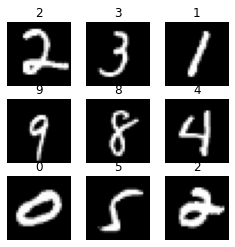

In [4]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                   get_y=parent_label)

dls = dblock.dataloaders(path, batch_size=64, num_workers=0)
dls.show_batch(max_n=9, figsize=(4,4))

torch.Size([3, 28, 28])
TensorCategory(0)


<AxesSubplot:>

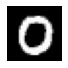

In [5]:
random_sample = next(iter(dls[1]))
x = random_sample[0][0]
y = random_sample[1][0]

print(x.shape)
print(y)
show_image(x)

In [6]:
learner = cnn_learner(dls, resnet18, metrics=accuracy)

In [14]:
learner = load_learner("models/cnn_model.pkl")

SuggestedLRs(valley=0.0030199517495930195)

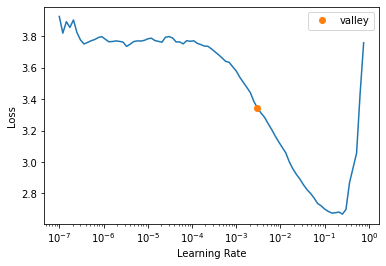

In [8]:
learner.lr_find()

In [10]:
learner.fine_tune(3, base_lr=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,6.727495,4.347281,0.937900,02:46


epoch,train_loss,valid_loss,accuracy,time
0,1.457962,1.302951,0.942700,04:51
1,0.348347,0.163035,0.988100,05:03
2,0.040844,0.029968,0.992900,05:00


In [15]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)
interp.most_confused(min_val=5)

/home/raphael/anaconda3/envs/fastapi_env/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


ValueError: not enough values to unpack (expected 3, got 2)

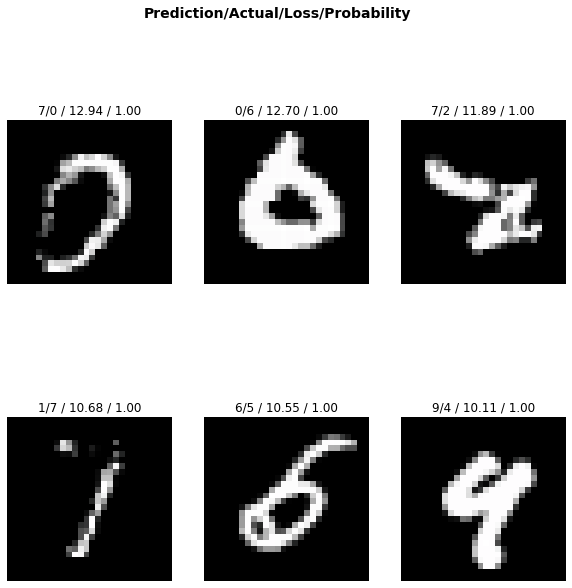

In [12]:
interp.plot_top_losses(6, figsize=(10,10))

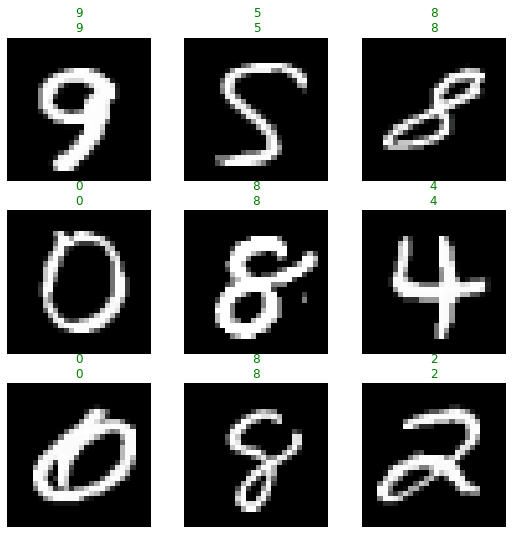

In [13]:
learner.show_results()

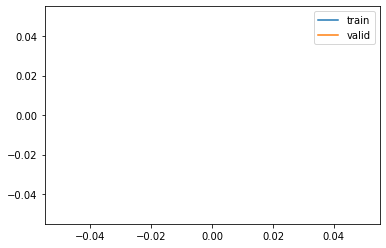

In [15]:
learner.recorder.plot_loss()

In [20]:
learner.export("cnn_model.pkl")

In [19]:
labels = learner.dls.vocab

def classify(img):
    pred, pred_idx, probs = learner.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=gr.outputs.Label(num_top_classes = 5), live=True)
interface.launch(debug=True)

Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f7cdc985b80>,
 'http://127.0.0.1:7860/',
 None)